<a href="https://colab.research.google.com/github/DzakyFawwaz/gejalaku-app/blob/main/gejalaku-ml/final/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project : Gejalaku**
**Exploratory Data Analysis (EDA)**

# Import Library & Packages

In [86]:
import os, shutil
import zipfile
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Data Loading (Data Mentah)

In [87]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mc006d5x2041","key":"9cbfefc7928603e51e693b7df8e126d6"}'}

In [88]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [89]:
!kaggle datasets download -d itachi9604/disease-symptom-description-dataset
!kaggle datasets download -d manncodes/drug-prescription-to-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset
License(s): CC-BY-SA-4.0
disease-symptom-description-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/manncodes/drug-prescription-to-disease-dataset
License(s): CC-BY-NC-SA-4.0
drug-prescription-to-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [90]:
!unzip disease-symptom-description-dataset.zip
!unzip drug-prescription-to-disease-dataset.zip

Archive:  disease-symptom-description-dataset.zip
replace Symptom-severity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Symptom-severity.csv    
replace dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: dataset.csv             
replace symptom_Description.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: symptom_Description.csv  
replace symptom_precaution.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: symptom_precaution.csv  
Archive:  drug-prescription-to-disease-dataset.zip
replace final.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: final.csv               


In [91]:
df_disease_rare = pd.read_csv('dataset.csv')
df_disease_rare.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df_drug_rare = pd.read_csv('final.csv')
df_drug_rare.head()

,Unnamed: 0,disease,drug
0,0,Alkylating Agent Cystitis,sodium bicarbonate
1,1,Alkylating Agent Cystitis,citric acid / sodium citrate
2,2,Abdominal Distension,bethanechol
3,3,Abdominal Distension,pamabrom
4,4,Abdominal Distension,bethanechol


# EDA Data Mentah

Menampilkan informasi data

In [93]:
df_disease_rare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [94]:
df_drug_rare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14683 entries, 0 to 14682
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14683 non-null  int64 
 1   disease     14683 non-null  object
 2   drug        14683 non-null  object
dtypes: int64(1), object(2)
memory usage: 344.3+ KB


Cek Missing Value

In [95]:
missing_values = df_disease_rare.isnull().sum()
print("Missing values pada kolom df_disease_rare:")
print(missing_values)

Missing values pada kolom df_disease_rare:
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64


In [96]:
missing_values = df_drug_rare.isnull().sum()
print("Missing values pada kolom df_drug_rare:")
print(missing_values)

Missing values pada kolom df_drug_rare:
Unnamed: 0    0
disease       0
drug          0
dtype: int64


Menampilkan data statistik

In [97]:
df_disease_rare.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [98]:
df_drug_rare.describe()

,Unnamed: 0
count,14683.000000
mean,7341.000000
std,4238.761336
min,0.000000
25%,3670.500000
50%,7341.000000
75%,11011.500000
max,14682.000000


## Eksplorasi kategori variabel

In [99]:
for column in df_disease_rare.columns:
    if df_disease_rare[column].dtype == 'object':
        print(f"Nilai unik pada kolom '{column}':")
        print(df_disease_rare[column].unique())
        print("\n")

Nilai unik pada kolom 'Disease':
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


Nilai unik pada kolom 'Symptom_1':
['itching' ' skin_rash' ' continuous_sneezing' ' shivering'
 ' stomach_pain' ' acidity' ' vomiting' ' indigestion' ' muscle_wasting'
 ' patches_in_throat' ' fatigue' ' weight_loss' ' sunken_eyes' ' cough'
 ' headache' ' chest_pain' ' back_pain' ' weakness_in

In [100]:
for column in df_drug_rare.columns:
    if df_drug_rare[column].dtype == 'object':
        print(f"Nilai unik pada kolom '{column}':")
        print(df_drug_rare[column].unique())
        print("\n")

Nilai unik pada kolom 'disease':
['Alkylating Agent Cystitis' 'Abdominal Distension'
 'Abdominal Distension Prior to Abdominal X-ray' ...
 'Yellow Fever Prophylaxis' 'Zinc Deficiency' 'Zollinger-Ellison Syndrome']


Nilai unik pada kolom 'drug':
['sodium bicarbonate' 'citric acid / sodium citrate' 'bethanechol' ...
 'trientine' 'burosumab' 'yellow fever vaccine']




## Visualisasi Data

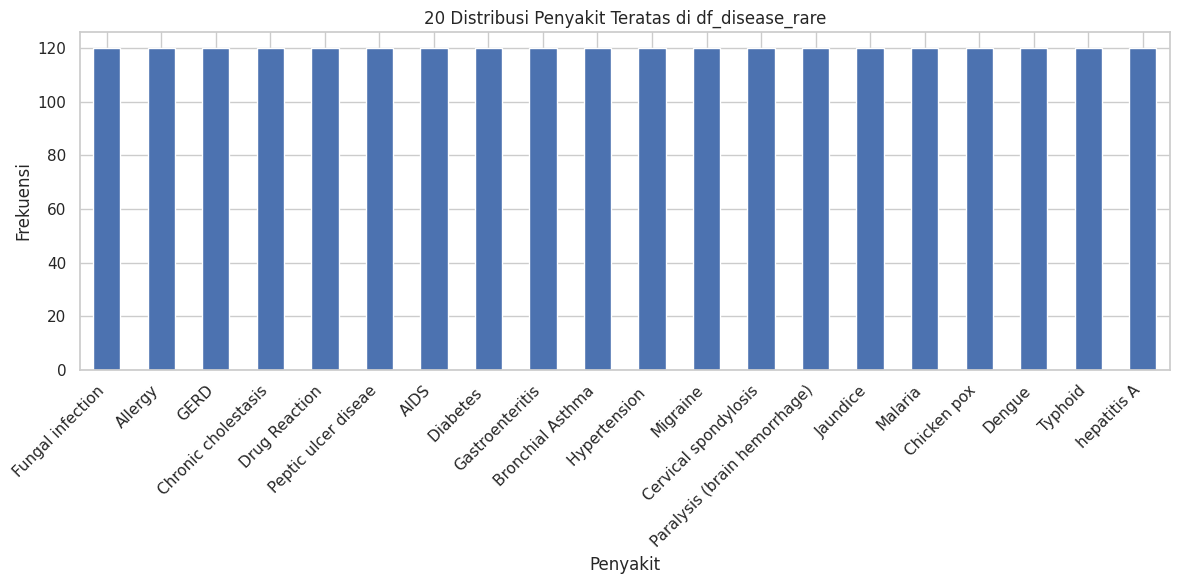

In [101]:
# Visualisasi distribusi penyakit di df_disease_rare
plt.figure(figsize=(12, 6))
df_disease_rare['Disease'].value_counts().nlargest(20).plot(kind='bar')
plt.title('20 Distribusi Penyakit Teratas di df_disease_rare')
plt.xlabel('Penyakit')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

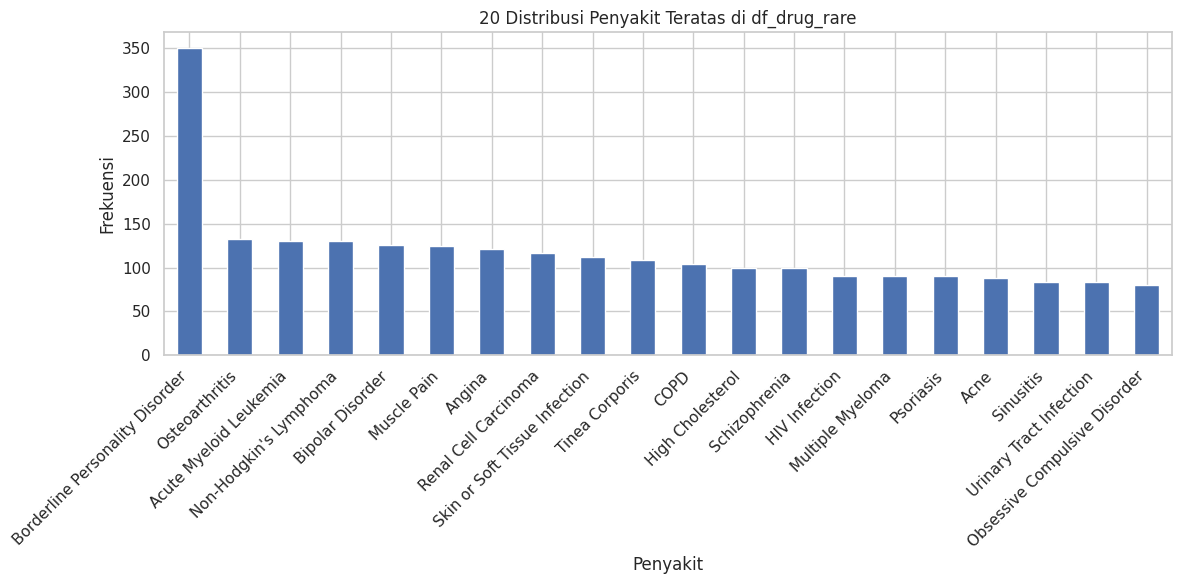

In [102]:
# Visualisasi distribusi penyakit di df_drug_rare
plt.figure(figsize=(12, 6))
df_drug_rare['disease'].value_counts().nlargest(20).plot(kind='bar')
plt.title('20 Distribusi Penyakit Teratas di df_drug_rare')
plt.xlabel('Penyakit')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

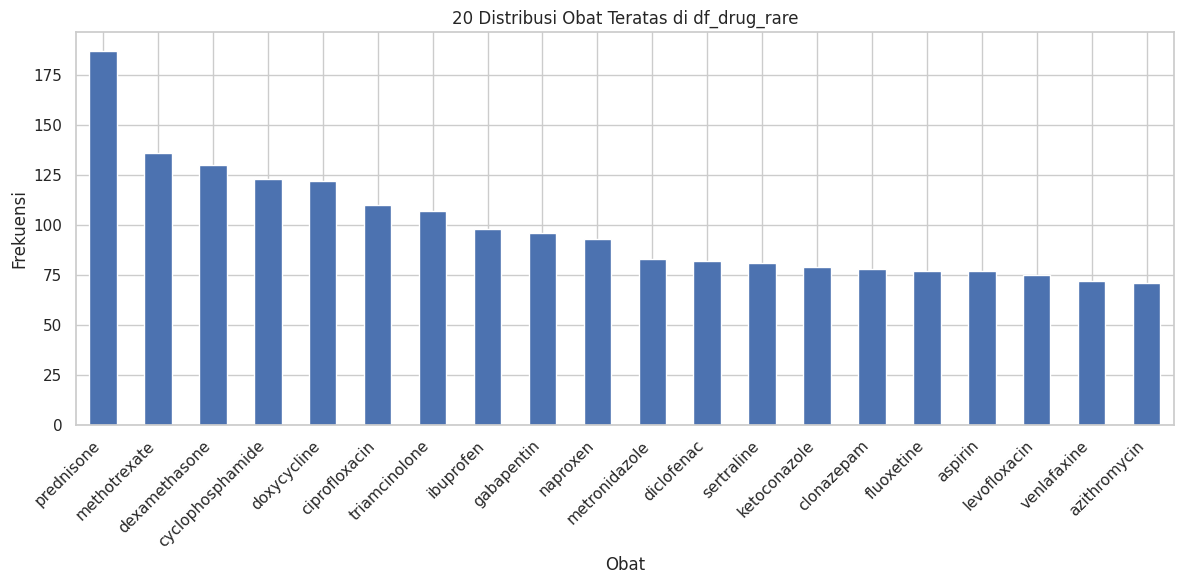

In [103]:
# Visualisasi distribusi obat dalam df_drug_rare
plt.figure(figsize=(12, 6))
df_drug_rare['drug'].value_counts().nlargest(20).plot(kind='bar')
plt.title('20 Distribusi Obat Teratas di df_drug_rare')
plt.xlabel('Obat')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

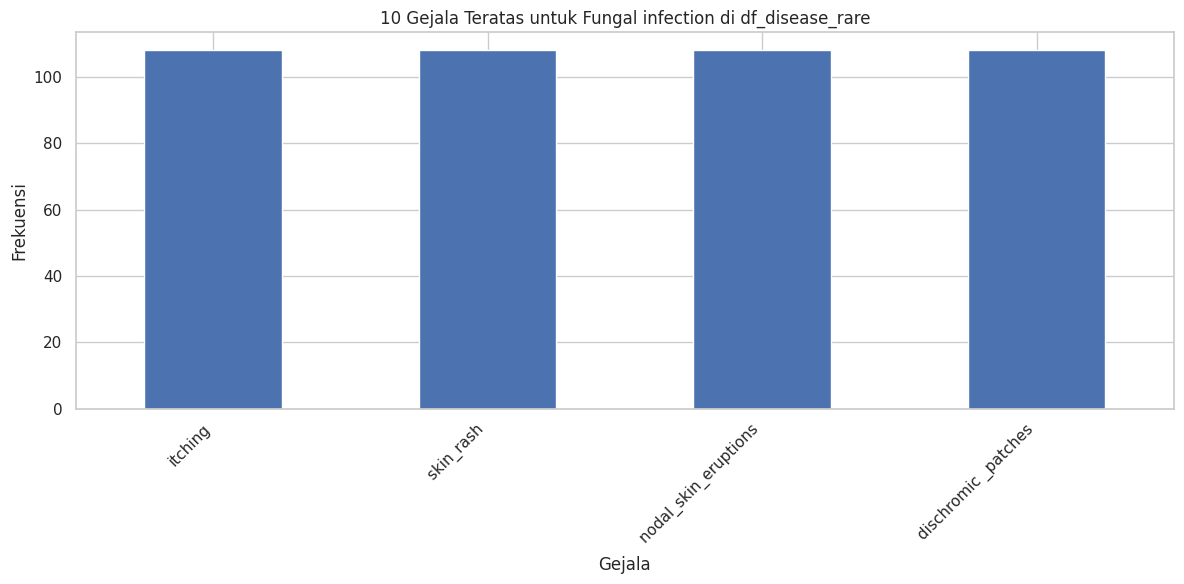

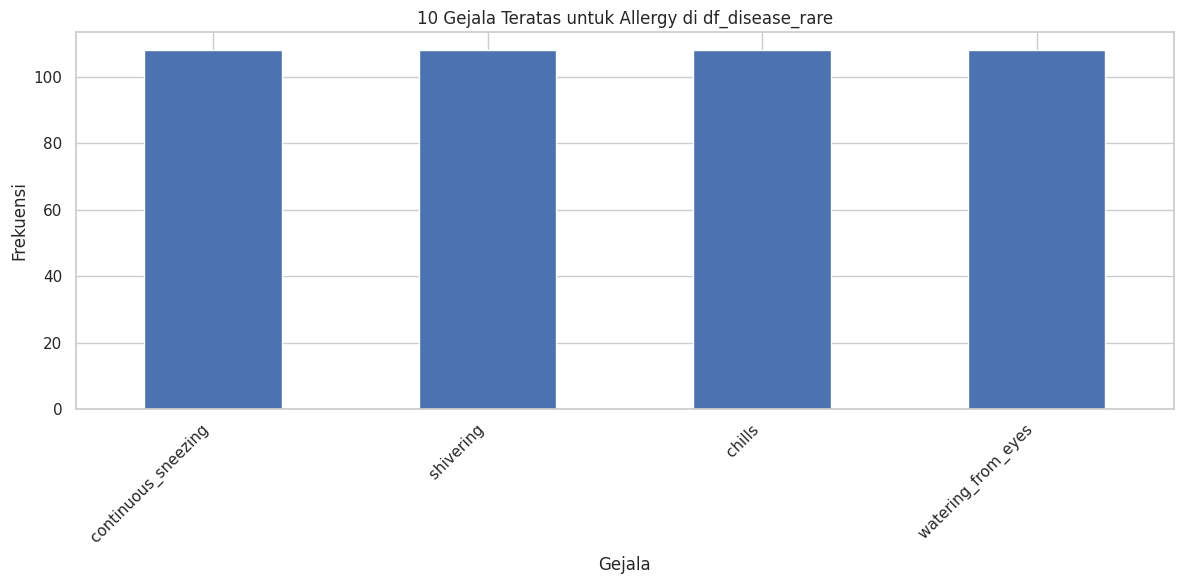

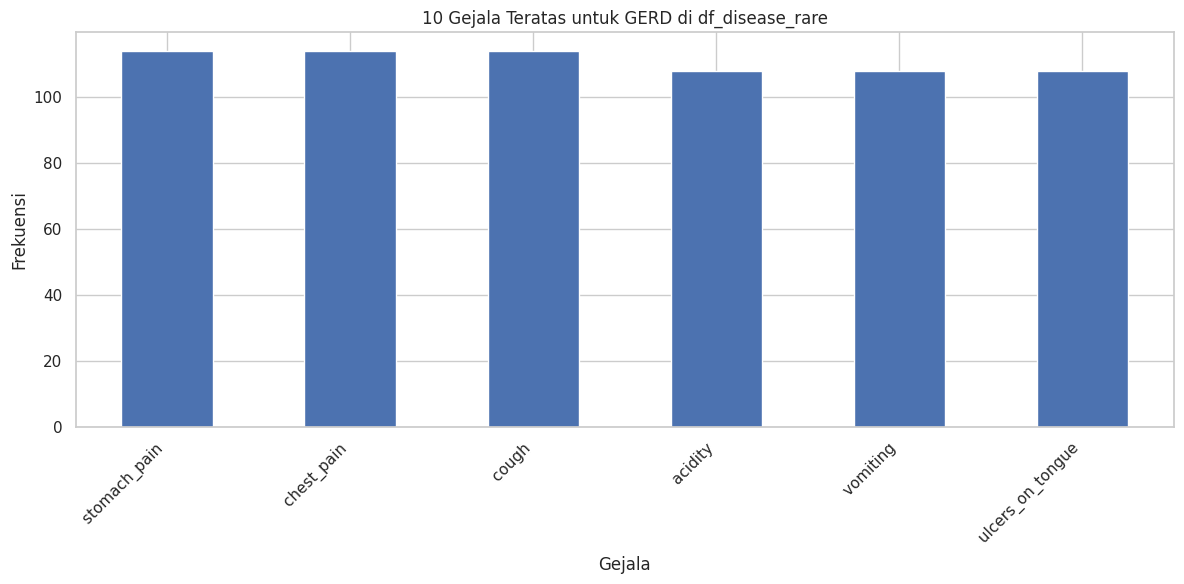

In [104]:
# Pilih beberapa penyakit utama dari df_disease_rare
top_diseases_disease = df_disease_rare['Disease'].value_counts().nlargest(3).index.tolist()

# Visualisasi frekuensi gejala untuk penyakit teratas yang dipilih di df_disease
for disease in top_diseases_disease:
    disease_df = df_disease_rare[df_disease_rare['Disease'] == disease]
    # Gabungkan gejala dari semua kolom gejala ke dalam satu Seri
    symptoms = disease_df.filter(like='Symptom').melt().dropna()['value']

    plt.figure(figsize=(12, 6))
    symptoms.value_counts().nlargest(10).plot(kind='bar')
    plt.title(f'10 Gejala Teratas untuk {disease} di df_disease_rare')
    plt.xlabel('Gejala')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

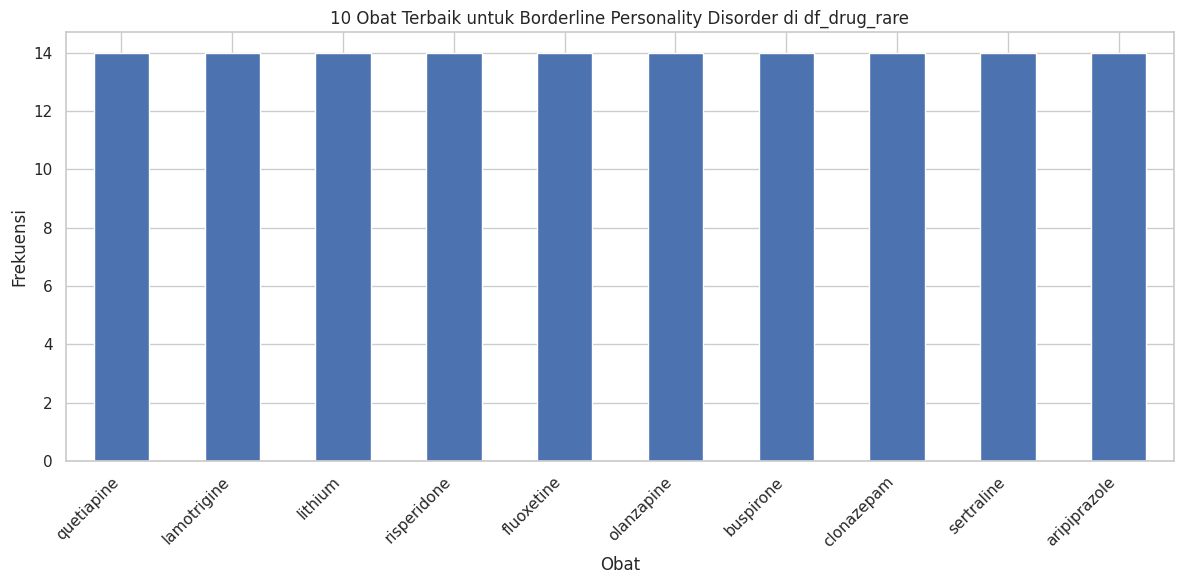

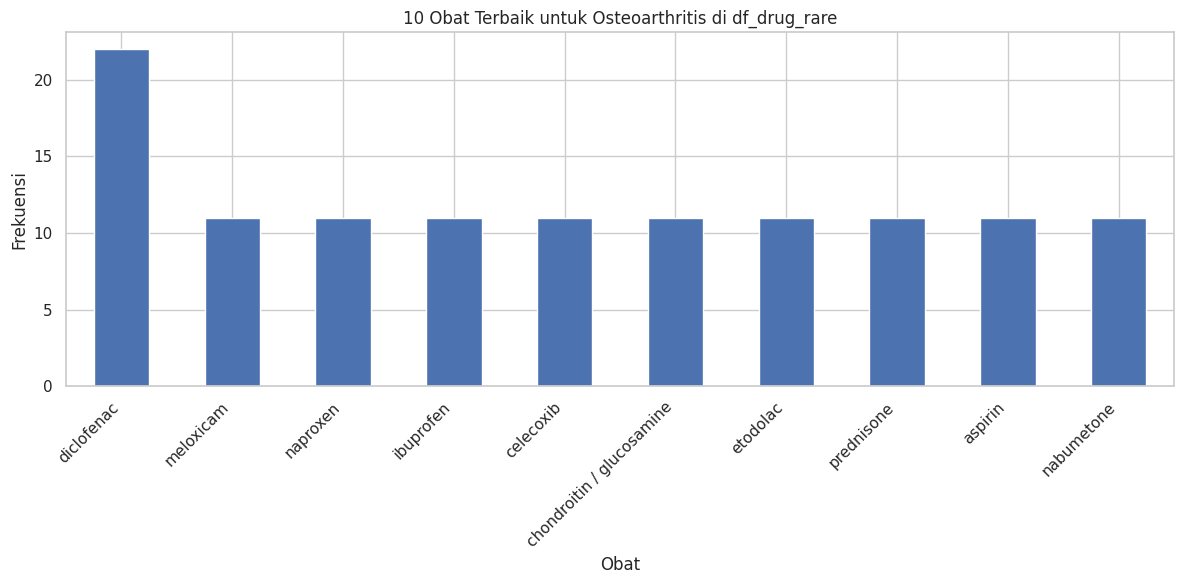

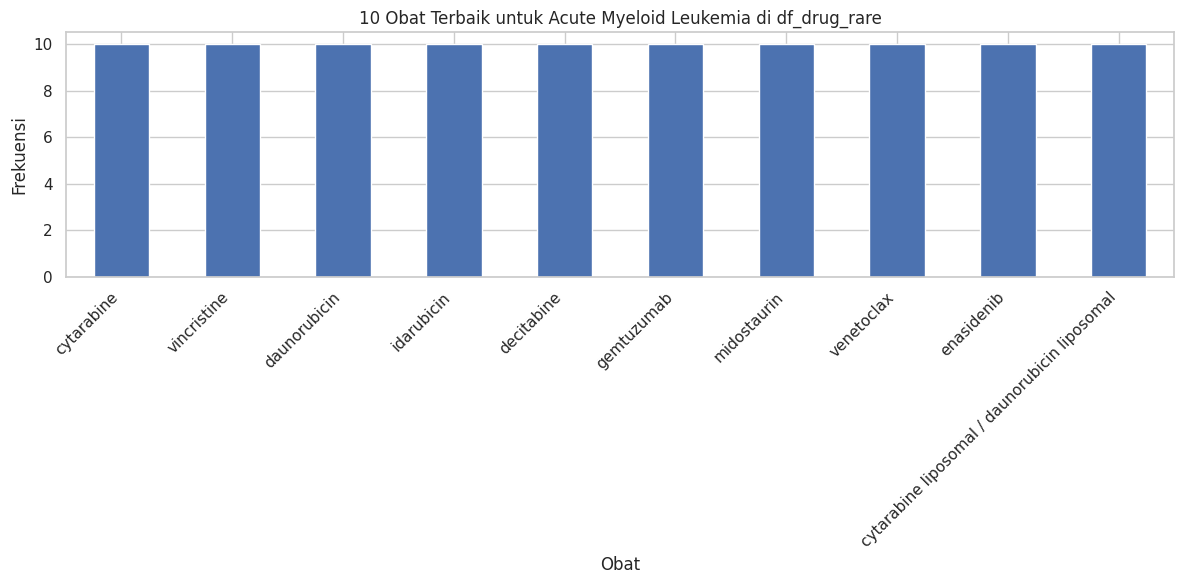

In [105]:
# Pilih beberapa penyakit utama dari df_drug
top_diseases_df = df_drug_rare['disease'].value_counts().nlargest(3).index.tolist()

# Visualisasi frekuensi obat untuk penyakit teratas yang dipilih di df_drug
for disease in top_diseases_df:
    disease_df = df_drug_rare[df_drug_rare['disease'] == disease]
    plt.figure(figsize=(12, 6))
    disease_df['drug'].value_counts().nlargest(10).plot(kind='bar')
    plt.title(f'10 Obat Terbaik untuk {disease} di df_drug_rare')
    plt.xlabel('Obat')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [106]:
# Analisis Hubungan Categorical
df_disease_melted = df_disease_rare.melt(id_vars=['Disease'], var_name='Symptom_Type', value_name='Symptom').dropna(subset=['Symptom'])
disease_symptom_crosstab = pd.crosstab(df_disease_melted['Disease'], df_disease_melted['Symptom'])
display(disease_symptom_crosstab)

disease_drug_crosstab = pd.crosstab(df_drug_rare['disease'], df_drug_rare['drug'])
display(disease_drug_crosstab)

Symptom,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
Disease,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIDS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acne,0,0,0,0,0,0,0,0,108,0,...,0,0,0,0,0,0,0,0,0,0
Alcoholic hepatitis,114,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,114,0
Allergy,0,0,0,0,0,0,0,0,0,0,...,108,0,0,0,0,0,0,0,0,0
Arthritis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bronchial Asthma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cervical spondylosis,0,0,0,0,0,0,108,0,0,0,...,0,108,0,0,0,0,0,0,0,0
Chicken pox,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,114


drug,C1 esterase inhibitor (human),abacavir,abacavir / lamivudine,abatacept,abciximab,abiraterone,abobotulinumtoxinA,acalabrutinib,acamprosate,acarbose,...,zinc acetate,zinc oxide,zinc sulfate,ziprasidone,zoledronic acid,zolmitriptan,zolpidem,zonisamide,zoster vaccine live,"zoster vaccine, inactivated"
disease,,,,,,,,,,,,,,,,,,,,,
ADHD (Attention Deficit Hyperactivity Disorder),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIDS Related Wasting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AV Heart Block,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abdominal Distension,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abdominal Distension Prior to Abdominal X-ray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xerostomia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yellow Fever Prophylaxis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zinc Deficiency,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


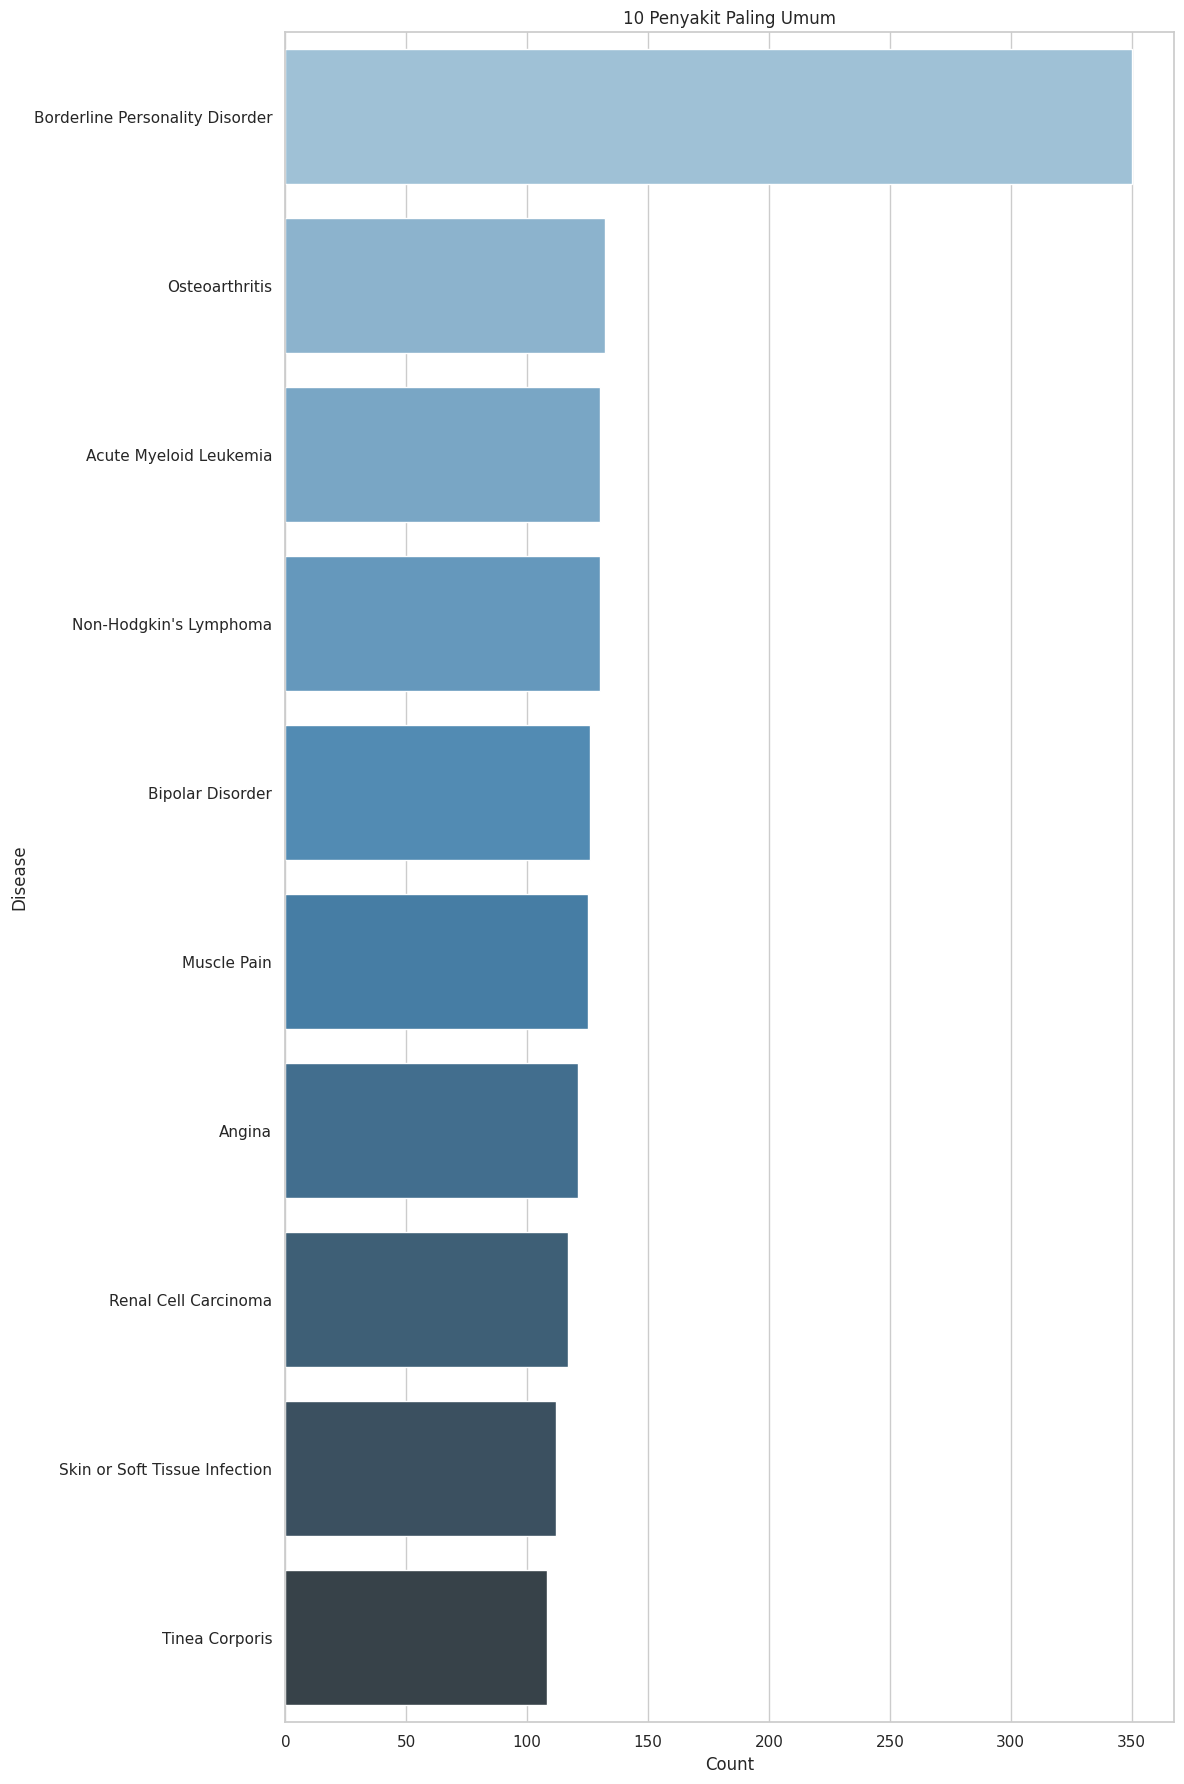

In [107]:
# 10 penyakit paling umum
top_diseases = df_drug_rare['disease'].value_counts().head(10)
# Plot top diseases
fig, axes = plt.subplots(1, 1, figsize=(12, 18))
sns.barplot(x=top_diseases.values, y=top_diseases.index, ax=axes, palette="Blues_d", hue=top_diseases.index, legend=False)
axes.set_title("10 Penyakit Paling Umum")
axes.set_xlabel("Count")
axes.set_ylabel("Disease")
sns.set(style="whitegrid")
plt.tight_layout()
plt.show()

<ipython-input-108-2208809374>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drugs.values, y=top_drugs.index, ax=axes, palette="Greens_d")


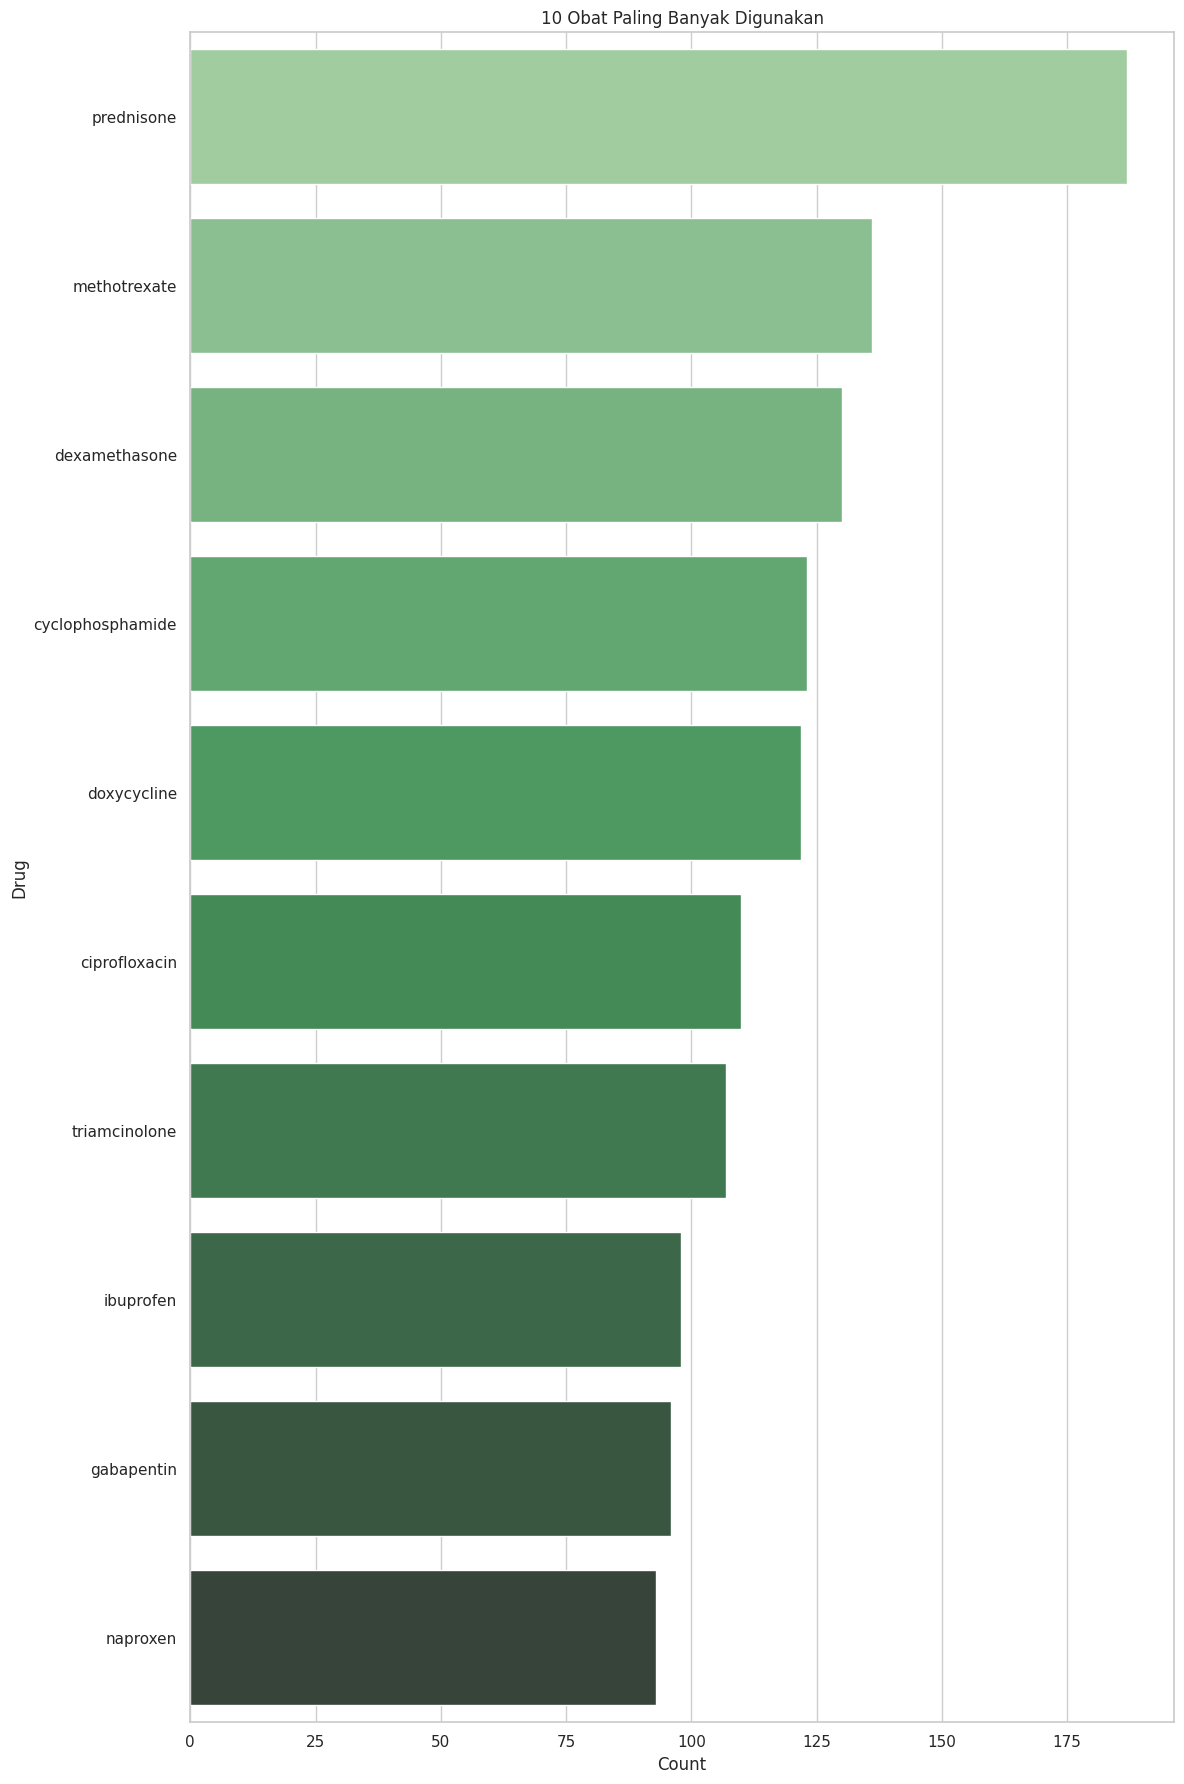

In [108]:
# 10 Obat Paling Banyak Digunakan
top_drugs = df_drug_rare['drug'].value_counts().head(10)
# Plot top drugs
fig, axes = plt.subplots(1, 1, figsize=(12, 18))
sns.barplot(x=top_drugs.values, y=top_drugs.index, ax=axes, palette="Greens_d")
axes.set_title("10 Obat Paling Banyak Digunakan")
axes.set_xlabel("Count")
axes.set_ylabel("Drug")
sns.set(style="whitegrid")
plt.tight_layout()
plt.show()

<ipython-input-109-4240456928>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=drugs_per_disease.values, y=drugs_per_disease.index, ax=axes, palette="Purples_d")


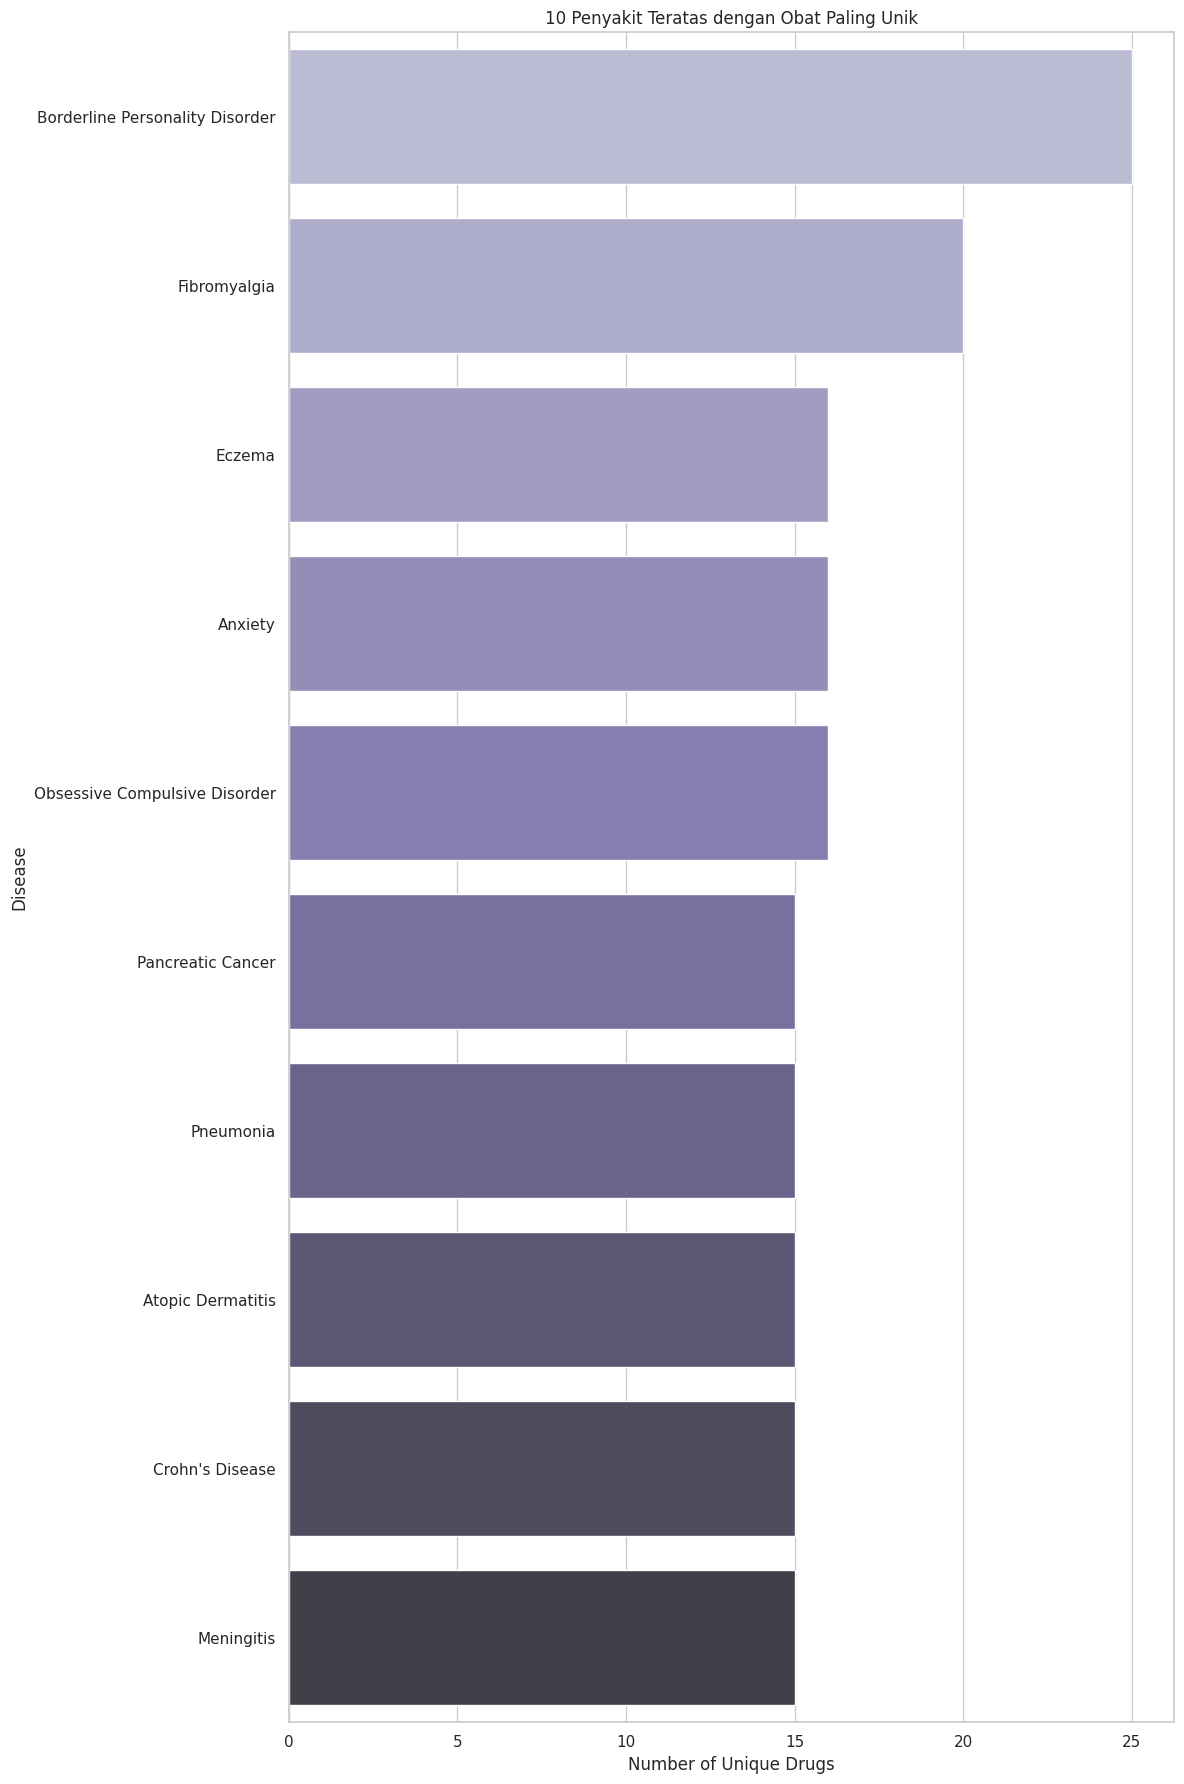

In [109]:
# Jumlah obat per penyakit (diurutkan)
drugs_per_disease = df_drug_rare.groupby('disease')['drug'].nunique().sort_values(ascending=False).head(10)
# Plot number of drugs per disease
fig, axes = plt.subplots(1, 1, figsize=(12, 18))
sns.barplot(x=drugs_per_disease.values, y=drugs_per_disease.index, ax=axes, palette="Purples_d")
axes.set_title("10 Penyakit Teratas dengan Obat Paling Unik")
axes.set_xlabel("Number of Unique Drugs")
axes.set_ylabel("Disease")
sns.set(style="whitegrid")
plt.tight_layout()
plt.show()


# Data Loading (Data Bersih)

In [129]:
# import dataset penyakit dan gejalanya
url1='https://drive.google.com/file/d/1rn3qjDsP_3SBsM_nJQoK272_sPH42uWt/view?usp=sharing'
url1='https://drive.google.com/uc?id=' + url1.split('/')[-2]
df_disease = pd.read_csv(url1)
df_disease.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Infeksi jamur,gatal,ruam kulit,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Infeksi jamur,ruam kulit,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Infeksi jamur,gatal,erupsi kulit nodular,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Infeksi jamur,gatal,ruam kulit,bercak kulit tidak merata warna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Infeksi jamur,gatal,ruam kulit,erupsi kulit nodular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
# import dataset obat dan penyakitnya
url2='https://drive.google.com/file/d/1OyXvR8vToPlnfmNi2US1PI203b3VooJn/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url2.split('/')[-2]
df_drug = pd.read_csv(url2)
df_drug.head()

,disease,drug
0,GERD (refluks asam lambung),omeprazole
1,GERD (refluks asam lambung),pantoprazole
2,GERD (refluks asam lambung),ranitidine
3,GERD (refluks asam lambung),famotidine
4,GERD (refluks asam lambung),lansoprazole


In [112]:
# import dataset penyakit dan deskripsinya
url3='https://drive.google.com/file/d/1EV_i7LnoArlKDLpsUy5h8xs3ik05S4f_/view?usp=sharing'
url3='https://drive.google.com/uc?id=' + url3.split('/')[-2]
df_disease_description = pd.read_csv(url3)
df_disease_description.head()

,Disease,Description
0,Reaksi obat,Reaksi obat yang merugikan (ADR) adalah cedera...
1,Malaria,Penyakit menular yang disebabkan oleh parasit ...
2,Alergi,Alergi adalah respons sistem kekebalan tubuh t...
3,Hipotiroidisme,"Hipotiroidisme, juga disebut tiroid yang kuran..."
4,Psoriasis,Psoriasis adalah kelainan kulit umum yang memb...


In [113]:
# import dataset penyakit dan pertolongan pertama (precaution)
url4='https://drive.google.com/file/d/1X3YzhAdz4b7v_Bj7-MBUYJ-qYO8v-MJl/view?usp=sharing'
url4='https://drive.google.com/uc?id=' + url4.split('/')[-2]
df_disease_precaution = pd.read_csv(url4)
df_disease_precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Reaksi obat,Hentikan iritasi,Konsultasikan dengan rumah sakit terdekat,berhenti minum obat,menindaklanjuti
1,Malaria,Konsultasikan dengan rumah sakit terdekat,Hindari makanan berminyak,Hindari Makanan Non Veget,Jauhkan nyamuk
2,Alergi,Terapkan Calamine,Area penutup dengan perban,NaN,Gunakan es untuk mengompres gatal
3,Hipotiroidisme,mengurangi stres,latihan,makan sehat,tidur nyenyak
4,Psoriasis,Cuci tangan dengan air sabun hangat,Hentikan Pendarahan Menggunakan Tekanan,Konsultasikan dengan dokter,mandi garam


# EDA Data Bersih

Menampilkan Informasi Data

In [114]:
df_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     304 non-null    object
 1   Symptom_1   304 non-null    object
 2   Symptom_2   304 non-null    object
 3   Symptom_3   304 non-null    object
 4   Symptom_4   272 non-null    object
 5   Symptom_5   234 non-null    object
 6   Symptom_6   186 non-null    object
 7   Symptom_7   158 non-null    object
 8   Symptom_8   140 non-null    object
 9   Symptom_9   120 non-null    object
 10  Symptom_10  110 non-null    object
 11  Symptom_11  68 non-null     object
 12  Symptom_12  47 non-null     object
 13  Symptom_13  30 non-null     object
 14  Symptom_14  19 non-null     object
 15  Symptom_15  18 non-null     object
 16  Symptom_16  10 non-null     object
 17  Symptom_17  1 non-null      object
dtypes: object(18)
memory usage: 42.9+ KB


In [115]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   disease  278 non-null    object
 1   drug     278 non-null    object
dtypes: object(2)
memory usage: 4.5+ KB


In [116]:
df_disease_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


In [117]:
df_disease_precaution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


Cek Missing Value

In [118]:
df_disease.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,32
Symptom_5,70
Symptom_6,118
Symptom_7,146
Symptom_8,164
Symptom_9,184


In [119]:
df_drug.isnull().sum()

,0
disease,0
drug,0


In [120]:
df_disease_description.isnull().sum()

,0
Disease,0
Description,0


In [121]:
df_disease_precaution.isnull().sum()

,0
Disease,0
Precaution_1,0
Precaution_2,0
Precaution_3,1
Precaution_4,1


Menampilkan Statistik Data

In [122]:
df_disease.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,304,304,304,304,272,234,186,158,140,120,110,68,47,30,19,18,10,1
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Migrain,muntah,muntah,kelelahan,demam tinggi,sakit kepala,mual,nyeri perut,mata menguning,rasa tidak enak badan,mata menguning,pernah injeksi tidak steril,rasa tidak enak badan,bintik merah di tubuh,nyeri dada,darah di dahak,nyeri otot,nyeri otot
freq,10,46,56,46,30,24,21,22,16,17,11,8,11,8,16,8,8,1


In [123]:
df_drug.describe()

,disease,drug
count,278,278
unique,41,214
top,Diabetes,doxycycline
freq,18,5


In [124]:
df_disease_description.describe()

,Disease,Description
count,41,41
unique,41,41
top,Reaksi obat,Reaksi obat yang merugikan (ADR) adalah cedera...
freq,1,1


In [125]:
df_disease_precaution.describe()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
count,41,41,41,40,40
unique,41,31,34,30,24
top,Reaksi obat,Konsultasikan dengan rumah sakit terdekat,latihan,Konsultasikan dengan dokter,menindaklanjuti
freq,1,4,3,6,6


## Visualisasi Data

<ipython-input-126-2063453296>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_symptom_count.values, y=disease_symptom_count.index, palette='viridis')


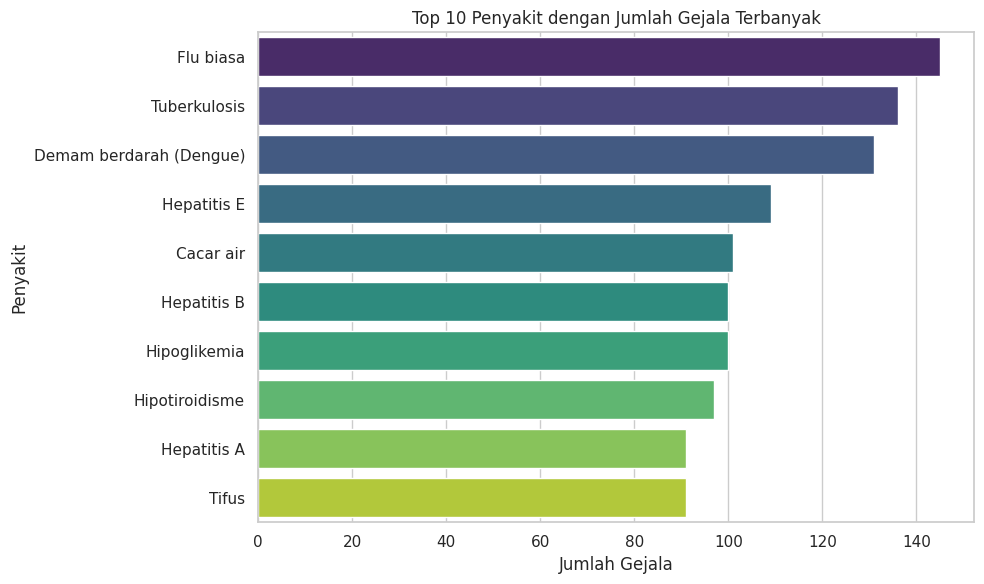

In [126]:
#Penyakit dengan jumlah gejala terbanyak
# Hitung jumlah symptom yang tidak null per penyakit
df_disease['num_symptoms'] = df_disease.iloc[:, 1:].notnull().sum(axis=1)

# Hitung total symptom per penyakit
disease_symptom_count = df_disease.groupby('Disease')['num_symptoms'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=disease_symptom_count.values, y=disease_symptom_count.index, palette='viridis')
plt.title('Top 10 Penyakit dengan Jumlah Gejala Terbanyak')
plt.xlabel('Jumlah Gejala')
plt.ylabel('Penyakit')
plt.tight_layout()
plt.show()

<ipython-input-127-737753267>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='magma')


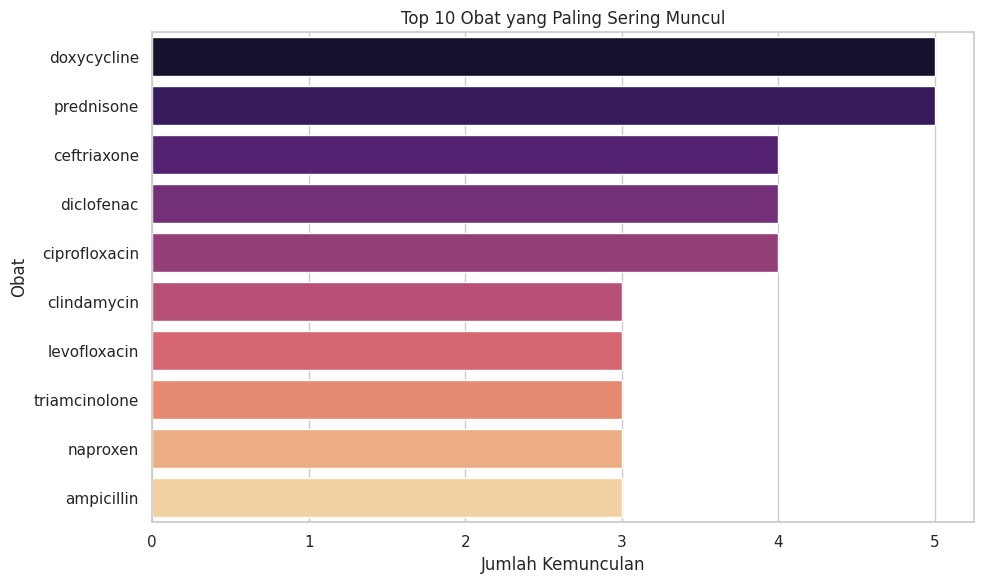

In [127]:
# Obat yang paling sering muncul di df_drug
top_drugs = df_drug['drug'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='magma')
plt.title('Top 10 Obat yang Paling Sering Muncul')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Obat')
plt.tight_layout()
plt.show()

<ipython-input-128-1428444863>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diseases.values, y=top_diseases.index, palette='coolwarm')


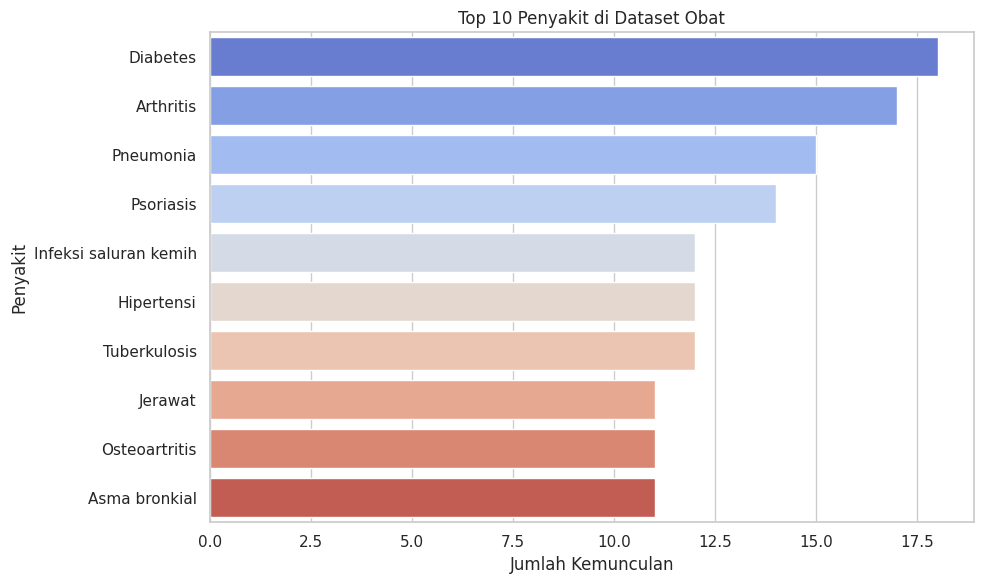

In [128]:
# Penyakit yang paling sering muncul di df_drug
top_diseases = df_drug['disease'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_diseases.values, y=top_diseases.index, palette='coolwarm')
plt.title('Top 10 Penyakit di Dataset Obat')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Penyakit')
plt.tight_layout()
plt.show()